In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import simsopt
import simsopt.geo
import simsopt.field
import os
import sys

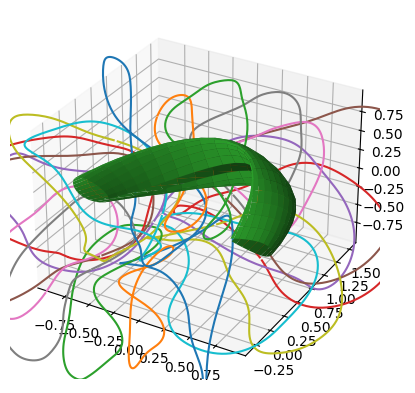

<Axes3D: >

In [137]:
db_path = "QUASR_db/simsopt_serials/0036"
sopt_objs = []

# for ID in range(10000):
# fID = ID // 1000 
# sopt_objs.append(simsopt.load(f'./simsopt_serials/{fID:04}/serial{ID:07}.json'))

for filename in  os.listdir(db_path):
  sopt_objs.append(simsopt.load(os.path.join(db_path, filename)))

simsopt.geo.plot(np.concatenate(sopt_objs[5]))

In [138]:
df = pd.DataFrame(sopt_objs, columns=["surfaces", "coils"])
df["lcfs"] = df["surfaces"].map(lambda x: x[-1])
df["AR"] = df["lcfs"].map(lambda x: x.aspect_ratio())
df["volume"] = df["lcfs"].map(lambda x: -x.volume())
df["nfp"] = df["lcfs"].map(lambda x: x.nfp)
df["R1"] = df["lcfs"].map(lambda x: x.minor_radius())

print(len(df))
df.head()

190


,surfaces,coils,lcfs,AR,volume,nfp,R1
0,"[SurfaceXYZTensorFourier2452, SurfaceXYZTensor...","[Coil15401, Coil15402, Coil15403, Coil15404, C...",SurfaceXYZTensorFourier2454,6.666667,0.444132,2,0.150000
1,[SurfaceXYZTensorFourier2455],"[Coil15421, Coil15422, Coil15423, Coil15424, C...",SurfaceXYZTensorFourier2455,20.000028,0.049348,2,0.050000
2,"[SurfaceXYZTensorFourier2456, SurfaceXYZTensor...","[Coil15441, Coil15442, Coil15443, Coil15444, C...",SurfaceXYZTensorFourier2457,10.000000,0.197392,2,0.100000
3,"[SurfaceXYZTensorFourier2458, SurfaceXYZTensor...","[Coil15461, Coil15462, Coil15463, Coil15464, C...",SurfaceXYZTensorFourier2459,9.999999,0.197392,2,0.100000
4,"[SurfaceXYZTensorFourier2460, SurfaceXYZTensor...","[Coil15481, Coil15482, Coil15483, Coil15484, C...",SurfaceXYZTensorFourier2464,4.000081,1.233651,2,0.249995


In [161]:
coils = df["coils"][0]
nfp = df["nfp"][0]
R1 = df["R1"][0]
computational_surface = simsopt.geo.SurfaceRZFourier.from_nphi_ntheta(nfp=nfp, nphi=64, ntheta=64)
computational_surface.set_rc(1,0,R1*2)
computational_surface.set_zs(1,0,R1*2)

# computational_surface = df["lcfs"][0]
# computational_surface.scale(2)
xyz_computational = computational_surface.gamma()

bs = simsopt.field.BiotSavart(coils)
bs.set_points_cart(xyz_computational.reshape((-1,3)))
B = bs.B().reshape(xyz_computational.shape)
BdotN = np.sum(computational_surface.normal() * B, axis=-1)

In [162]:
import plotly.express as px
import plotly.graph_objects as go

go.Figure([
  go.Surface(x=xyz_computational[:,:,0], y=xyz_computational[:,:,1], z=xyz_computational[:,:,2], surfacecolor=BdotN)
])

In [163]:
px.imshow(np.abs(np.fft.fftshift(np.fft.fft2(BdotN))))

In [157]:
px.imshow(np.real(np.fft.fftshift(np.fft.fft2(BdotN))))